# Turuku: An Intelligent Sleep Tracking and Disorder Detection App

## Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Load the CSV file
file_path = 'https://raw.githubusercontent.com/Turuku-Bangkit-Capstone-Project/Machine-Learning/refs/heads/main/data/sleep_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,ID,Chronotype,Gender,Age,Bedtime,Wakeup time,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Bear,Male,48,9:39 PM,3:57 AM,6.18,9,7,90,Normal,125/80,62,6170
1,2,Bear,Female,50,10:36 PM,7:47 AM,9.11,2,8,44,Normal,120/80,68,8744
2,3,Bear,Female,29,11:22 PM,7:06 AM,7.44,10,3,86,Normal,120/80,91,7322
3,4,Bear,Female,41,10:26 PM,8:24 AM,9.58,5,1,48,Normal,120/80,79,6555
4,5,Bear,Female,22,8:03 PM,4:27 AM,8.24,4,3,49,Normal,120/80,93,7470


## Handle Missing Values

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical columns with the median
num_cols = ['Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps']
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Fill missing categorical columns with the mode
cat_cols = ['Chronotype', 'Gender', 'BMI Category']
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify no missing values remain
print(data.isnull().sum())

ID                         0
Chronotype                 0
Gender                     0
Age                        0
Bedtime                    0
Wakeup time                0
Sleep Duration             0
Quality of Sleep           0
Stress Level               0
Physical Activity Level    0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64
ID                         0
Chronotype                 0
Gender                     0
Age                        0
Bedtime                    0
Wakeup time                0
Sleep Duration             0
Quality of Sleep           0
Stress Level               0
Physical Activity Level    0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64


## Encoding for Categorical Data

In [4]:
# List of categorical columns to encode
categorical_columns = ['Chronotype', 'Gender', 'BMI Category']

# label encoding
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Display transformed data
data.head()

,ID,Chronotype,Gender,Age,Bedtime,Wakeup time,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,0,1,48,9:39 PM,3:57 AM,6.18,9,7,90,0,125/80,62,6170
1,2,0,0,50,10:36 PM,7:47 AM,9.11,2,8,44,0,120/80,68,8744
2,3,0,0,29,11:22 PM,7:06 AM,7.44,10,3,86,0,120/80,91,7322
3,4,0,0,41,10:26 PM,8:24 AM,9.58,5,1,48,0,120/80,79,6555
4,5,0,0,22,8:03 PM,4:27 AM,8.24,4,3,49,0,120/80,93,7470


## Normalizing Numerical Features

In [5]:
# numerical columns for normalization
num_cols = ['Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Min-Max scaling
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Display normalized data
data.head()

,ID,Chronotype,Gender,Age,Bedtime,Wakeup time,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,0,1,48,9:39 PM,3:57 AM,0.261975,9,0.666667,90,0,125/80,0.050,0.452922
1,2,0,0,50,10:36 PM,7:47 AM,0.386181,2,0.777778,44,0,120/80,0.200,0.820689
2,3,0,0,29,11:22 PM,7:06 AM,0.315388,10,0.222222,86,0,120/80,0.775,0.617517
3,4,0,0,41,10:26 PM,8:24 AM,0.406104,5,0.000000,48,0,120/80,0.475,0.507930
4,5,0,0,22,8:03 PM,4:27 AM,0.349301,4,0.222222,49,0,120/80,0.825,0.638663


## Converting non-numerical values

In [6]:
# Convert bedtime and wakeup time to hours since midnight (because it's not numerical)
data['Bedtime'] = pd.to_datetime(data['Bedtime']).dt.hour
data['Wakeup time'] = pd.to_datetime(data['Wakeup time']).dt.hour

data.head()

<ipython-input-6-f32815841a3e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Bedtime'] = pd.to_datetime(data['Bedtime']).dt.hour
<ipython-input-6-f32815841a3e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Wakeup time'] = pd.to_datetime(data['Wakeup time']).dt.hour


,ID,Chronotype,Gender,Age,Bedtime,Wakeup time,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,0,1,48,21,3,0.261975,9,0.666667,90,0,125/80,0.050,0.452922
1,2,0,0,50,22,7,0.386181,2,0.777778,44,0,120/80,0.200,0.820689
2,3,0,0,29,23,7,0.315388,10,0.222222,86,0,120/80,0.775,0.617517
3,4,0,0,41,22,8,0.406104,5,0.000000,48,0,120/80,0.475,0.507930
4,5,0,0,22,20,4,0.349301,4,0.222222,49,0,120/80,0.825,0.638663


## Drop Irrelevant & difficult Columns

In [7]:
# Drop ID & Blood Pressure column
data = data.drop(['ID'], axis=1)
data = data.drop(['Blood Pressure'], axis=1)

# Verify the resulting dataset
data.head()

,Chronotype,Gender,Age,Bedtime,Wakeup time,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,BMI Category,Heart Rate,Daily Steps
0,0,1,48,21,3,0.261975,9,0.666667,90,0,0.050,0.452922
1,0,0,50,22,7,0.386181,2,0.777778,44,0,0.200,0.820689
2,0,0,29,23,7,0.315388,10,0.222222,86,0,0.775,0.617517
3,0,0,41,22,8,0.406104,5,0.000000,48,0,0.475,0.507930
4,0,0,22,20,4,0.349301,4,0.222222,49,0,0.825,0.638663


## Saving the Cleaned Data

In [8]:
# Save the cleaned dataset
data.to_csv('cleaned_data.csv', index=False)

## Loading the Cleaned Data

In [9]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_data.csv')

data.head()

,Chronotype,Gender,Age,Bedtime,Wakeup time,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level,BMI Category,Heart Rate,Daily Steps
0,0,1,48,21,3,0.261975,9,0.666667,90,0,0.050,0.452922
1,0,0,50,22,7,0.386181,2,0.777778,44,0,0.200,0.820689
2,0,0,29,23,7,0.315388,10,0.222222,86,0,0.775,0.617517
3,0,0,41,22,8,0.406104,5,0.000000,48,0,0.475,0.507930
4,0,0,22,20,4,0.349301,4,0.222222,49,0,0.825,0.638663


In [10]:
# Display basic information and statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Chronotype               3500 non-null   int64  
 1   Gender                   3500 non-null   int64  
 2   Age                      3500 non-null   int64  
 3   Bedtime                  3500 non-null   int64  
 4   Wakeup time              3500 non-null   int64  
 5   Sleep Duration           3500 non-null   float64
 6   Quality of Sleep         3500 non-null   int64  
 7   Stress Level             3500 non-null   float64
 8   Physical Activity Level  3500 non-null   int64  
 9   BMI Category             3500 non-null   int64  
 10  Heart Rate               3500 non-null   float64
 11  Daily Steps              3500 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 328.2 KB
None
        Chronotype       Gender          Age      Bedtime  Wakeup time  \
count 

## Visualizing Distributions

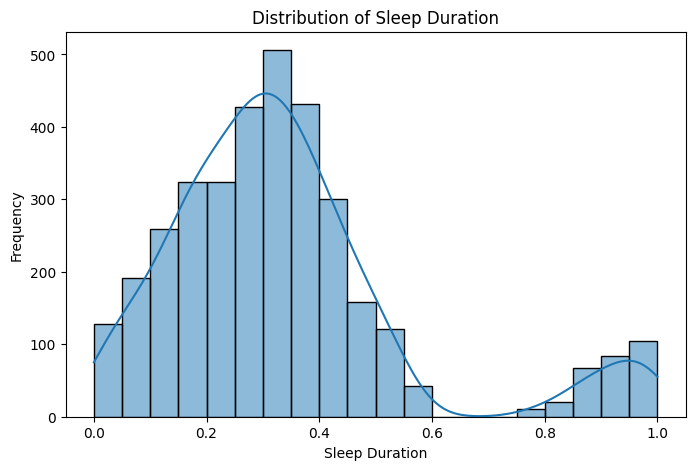

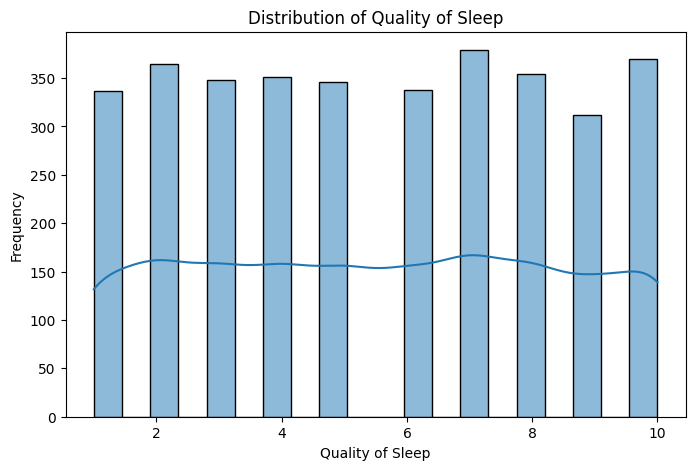

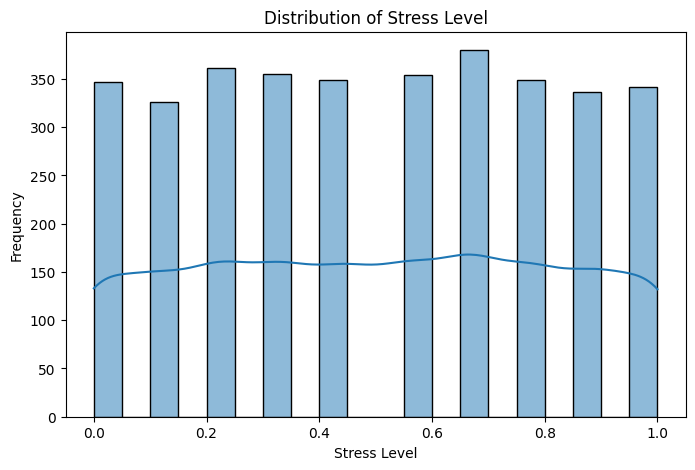

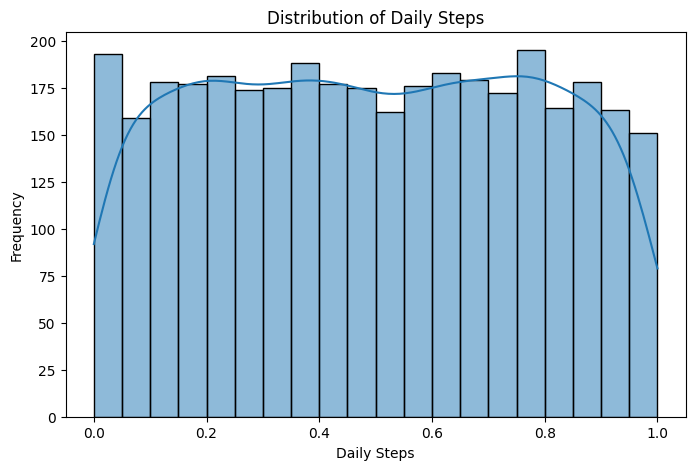

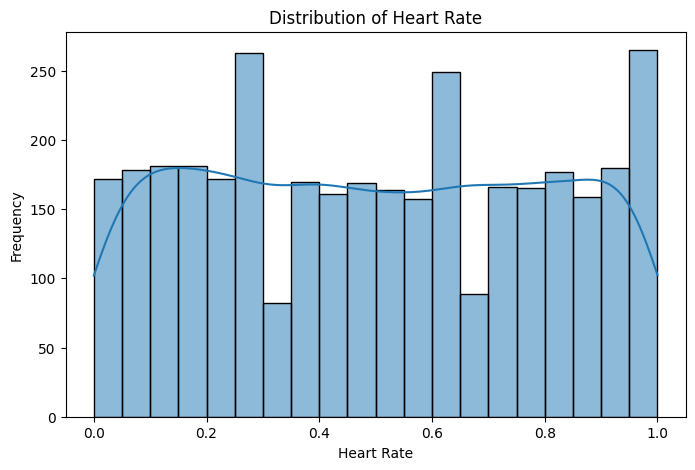

In [11]:
# Plot histograms for numerical columns
num_cols = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Daily Steps', 'Heart Rate']

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Correlation Analysis Between Features

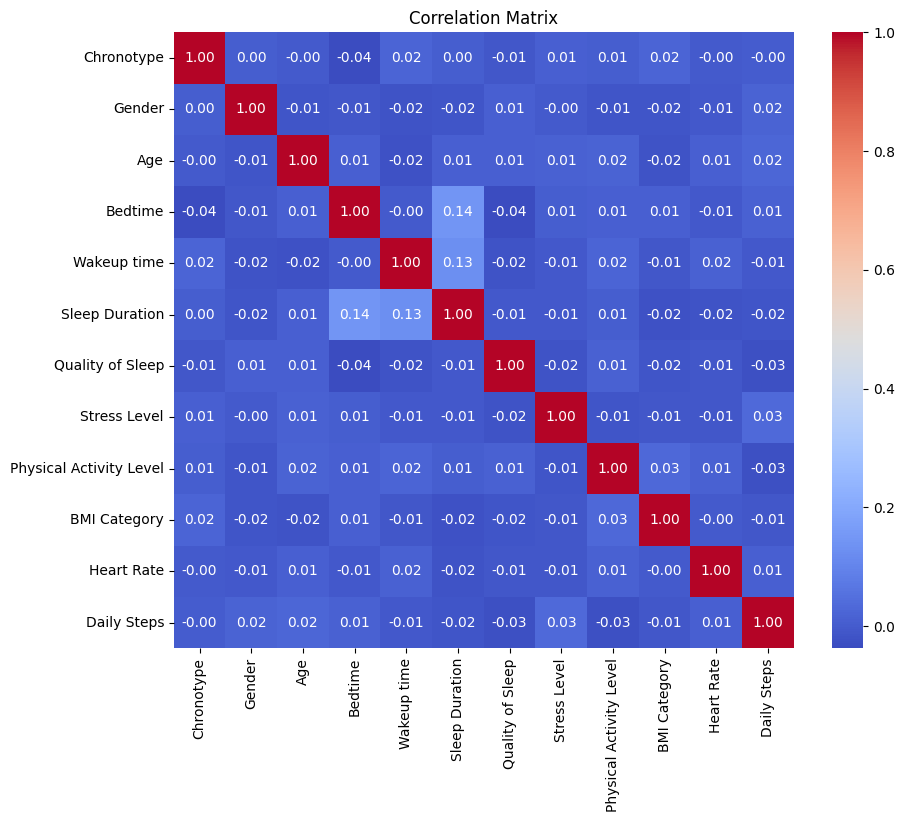

In [12]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Identifying Key Features

In [13]:
# Identify highly correlated features
target = 'Quality of Sleep'
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)
print('Features most correlated with Quality of Sleep:\n', correlation_with_target)

Features most correlated with Quality of Sleep:
 Quality of Sleep           1.000000
Physical Activity Level    0.011641
Age                        0.011450
Gender                     0.008484
Sleep Duration            -0.005525
Chronotype                -0.009480
Heart Rate                -0.009757
BMI Category              -0.016323
Stress Level              -0.018972
Wakeup time               -0.020197
Daily Steps               -0.025304
Bedtime                   -0.037084
Name: Quality of Sleep, dtype: float64


## Check Feature Importance

Daily Steps                0.171047
Sleep Duration             0.165879
Physical Activity Level    0.135397
Heart Rate                 0.129575
Age                        0.114888
Stress Level               0.079704
Bedtime                    0.056628
Wakeup time                0.053419
Chronotype                 0.044766
BMI Category               0.029493
Gender                     0.019203
dtype: float64


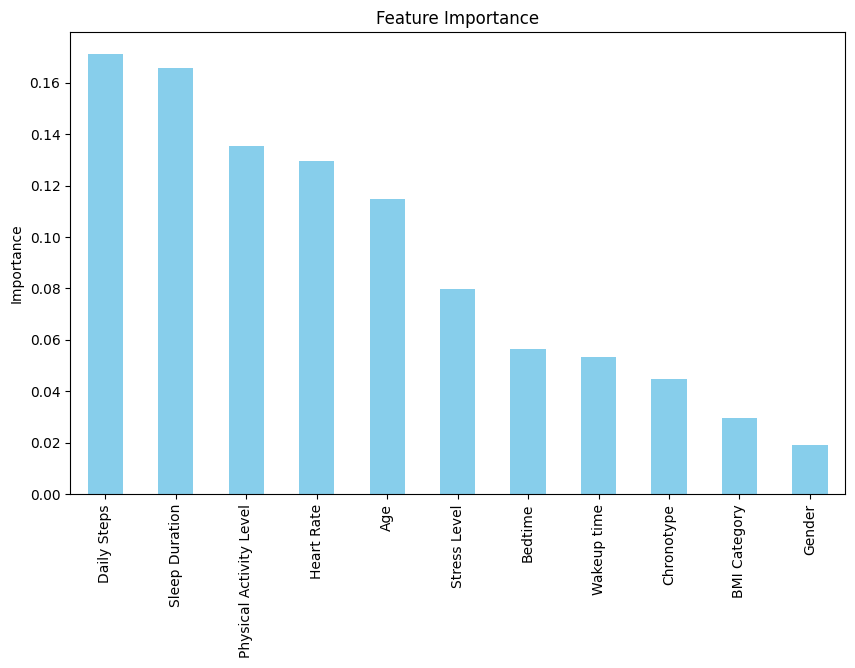

In [14]:
# Define features (X) and target (y)
X = data.drop(columns=[target])
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Compute feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importance
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

## Select Final Features

In [15]:
# Select top features
top_features = feature_importances.head(3).index.tolist()
critical_features = ['Age', 'Gender', 'Chronotype']
top_features.extend(critical_features)
X_selected = X[top_features]

# Save selected features
X_selected.to_csv('selected_features.csv', index=False)
print('Top features selected:', top_features)

Top features selected: ['Daily Steps', 'Sleep Duration', 'Physical Activity Level', 'Age', 'Gender', 'Chronotype']


## Loading and Preparing Final Data

In [16]:
# Load selected features
data = pd.read_csv('selected_features.csv')
data.head()

,Daily Steps,Sleep Duration,Physical Activity Level,Age,Gender,Chronotype
0,0.452922,0.261975,90,48,1,0
1,0.820689,0.386181,44,50,0,0
2,0.617517,0.315388,86,29,0,0
3,0.507930,0.406104,48,41,0,0
4,0.638663,0.349301,49,22,0,0


## Final Data Visualization

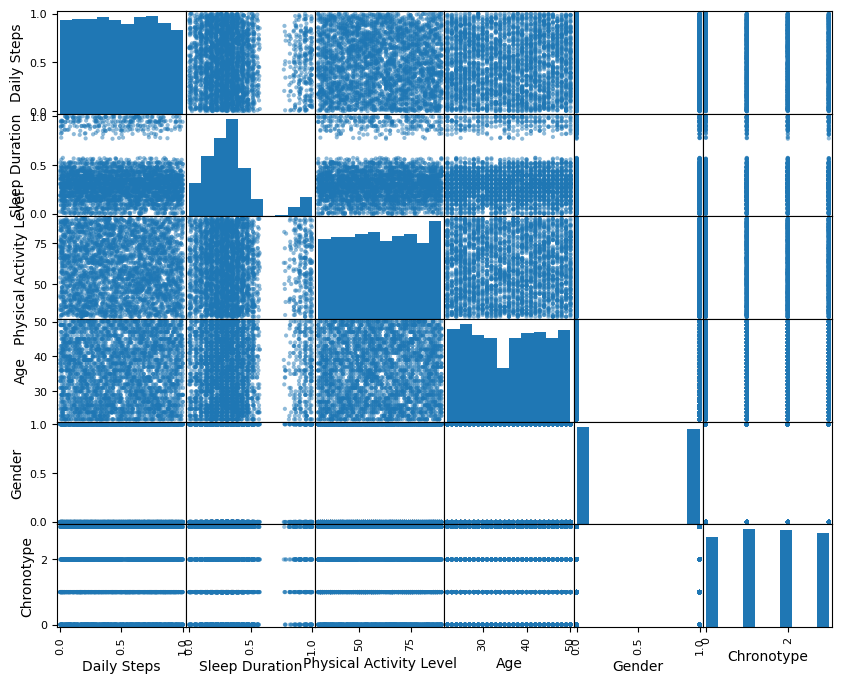

In [17]:
# Basic statistics and visualizations
data.describe()

# Visualize relationships
pd.plotting.scatter_matrix(data, figsize=(10, 8))
plt.show()

## Model Design

In [18]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(5,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,241 (1.02 MB)

 Trainable params: 266,241 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Define the callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True, mode='min', min_delta=0, baseline=None)

## Training the Model

In [20]:
from sklearn.model_selection import train_test_split

# Split the data
X = data.drop('Sleep Duration', axis=1)
y = data['Sleep Duration']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15.5709 - mae: 2.5927 - val_loss: 0.0769 - val_mae: 0.2315
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0619 - mae: 0.1845 - val_loss: 0.0538 - val_mae: 0.1780
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0527 - mae: 0.1658 - val_loss: 0.0674 - val_mae: 0.1833
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mae: 0.1678 - val_loss: 0.0767 - val_mae: 0.1994
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0542 - mae: 0.1698 - val_loss: 0.0645 - val_mae: 0.2065
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


## Evaluating the Model


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0567 - mae: 0.1831 
Model Performance: [0.053807999938726425, 0.17796124517917633]


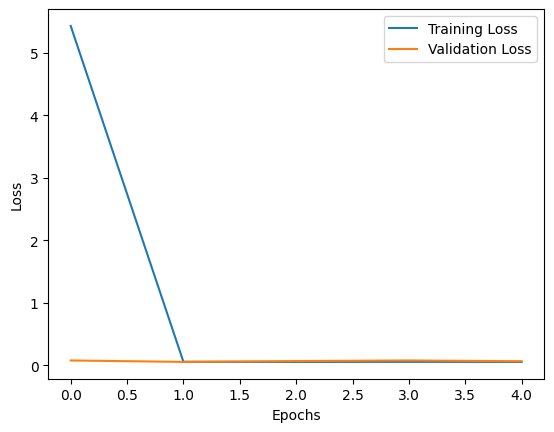

In [21]:
# Evaluate the model
results = model.evaluate(X_val, y_val)
print(f'Model Performance: {results}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing The Model

In [22]:
# Example input for testing
#Daily Steps  , Physical Activity Level, Age, Gender, Chronotypes
sample_input = np.array([[0.6175167881125876,70,25,1, 2]])  # taken from selected_features.csv

# Make a prediction
predicted_duration = model.predict(sample_input)

# Extract min and max for 'Sleep Duration' from the scaler
sleep_min = scaler.data_min_[0]  # 'Sleep Duration' minimum value
sleep_max = scaler.data_max_[0]  # 'Sleep Duration' maximum value

# Inverse transform to get the original duration in hours
sleep_duration_hours = predicted_duration * (sleep_max - sleep_min) + sleep_min
sleep_duration_hours = sleep_duration_hours[0][0]  # Extract the single element

print(f"Recommend Sleep Duration (in hours): {sleep_duration_hours}")

# Convert to HH:MM format
hours = int(sleep_duration_hours)  # Integer part
minutes = int((sleep_duration_hours - hours) * 60)  # Decimal part to minutes
formatted_time = f"{hours:02}:{minutes:02}"
print(f"Sleep Duration: {formatted_time} (HH:MM)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Recommend Sleep Duration (in hours): 7.979801654815674
Sleep Duration: 07:58 (HH:MM)


# Saving the Model

In [23]:
# Save the entire model
model.save("turuku_sleep_model.h5")  # Saves the model in HDF5 format

#import to tensorflow js

In [24]:
!pip install tensorflowjs

In [25]:
import tensorflowjs as tfjs

In [27]:
tfjs.converters.save_keras_model(model, "turuku_sleep_model_js")

failed to lookup keras version from the file,
    this is likely a weight only file
